# Boston housing Dataset

In [4]:
%matplotlib notebook
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
target = np.array(boston.target)
target = pd.DataFrame(target)
target.columns = ['target']
print(target.shape)
target

(506, 1)


,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


<Figure size 432x288 with 0 Axes>

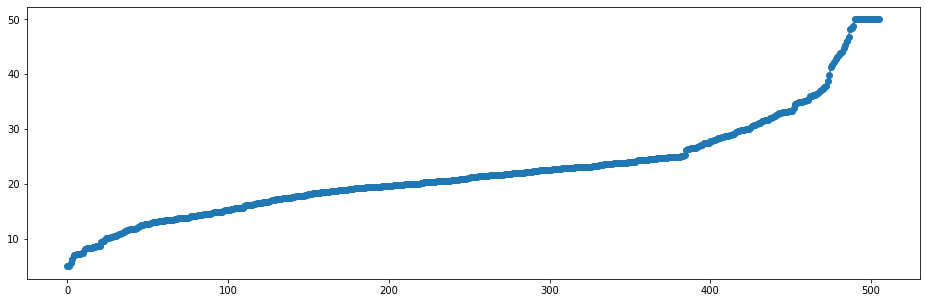

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize = (16,5))
plt.plot(target.sort_values(by='target', ignore_index=True, ascending=True), '-o')


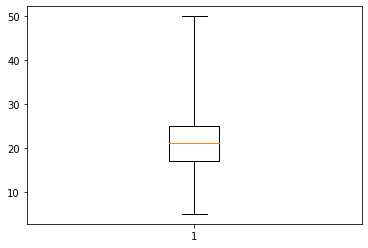

In [12]:
plt.boxplot(target['target'], whis='range')
plt.show()

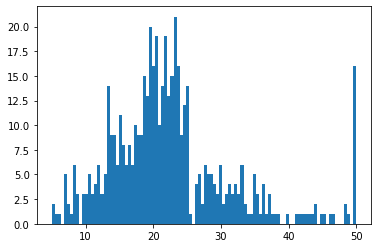

In [27]:
_ = plt.hist(target['target'], bins=100)

In [25]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [28]:
df['target'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


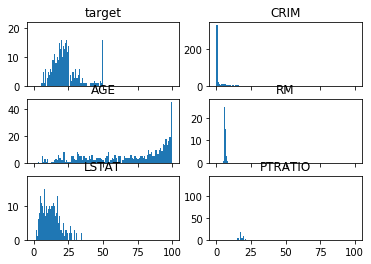

In [29]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, sharex=True)
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
titles = ['target', 'CRIM', 'AGE', 'RM', 'LSTAT', 'PTRATIO']

for n in range(0, len(axs)):
    axs[n].hist(df[titles[n]], bins=100)
    axs[n].set_title('{}'.format(titles[n]))

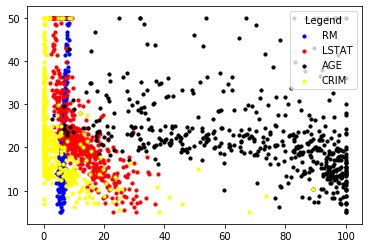

In [14]:
df['target'] = target
plt.scatter( df['RM'], df['target'],s=10, c='blue', label="RM")
plt.scatter( df['LSTAT'], df['target'],s=10, c='red', label='LSTAT')
plt.scatter( df['AGE'], df['target'],s=10, c='black', label='AGE')
plt.scatter( df['CRIM'], df['target'],s=10, c='yellow', label='CRIM')
plt.legend(loc=1, frameon=True, title="Legend")

In [31]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

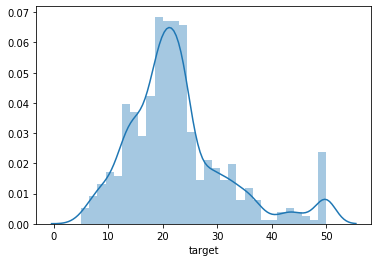

In [19]:
sns.distplot(df['target'], bins=30)

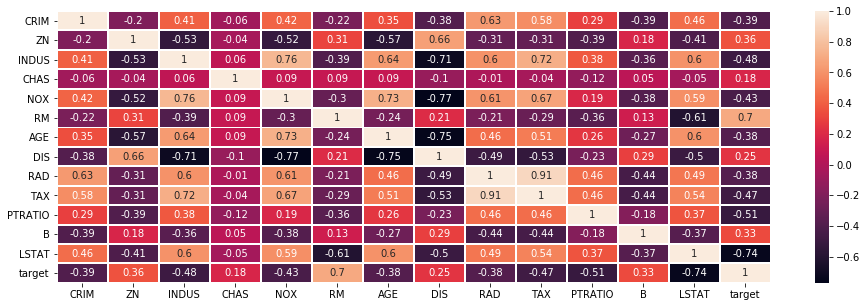

In [25]:
plt.figure(figsize = (16,5))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.9)

RM has a strong positive corrolation with the target (+0.7) 


LSTAT has a strong negative corrolation with the target (-0.74)

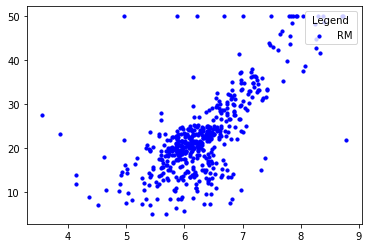

In [30]:
df['target'] = target
plt.scatter( df['RM'], df['target'],s=10, c='blue', label="RM")
# plt.scatter( df['LSTAT'], df['target'],s=10, c='red', label='LSTAT')
# plt.scatter( df['AGE'], df['target'],s=10, c='black', label='AGE')
# plt.scatter( df['CRIM'], df['target'],s=10, c='yellow', label='CRIM')
plt.legend(loc=1, frameon=True, title="Legend")

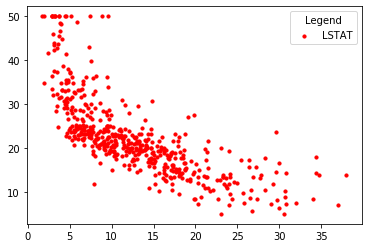

In [31]:
df['target'] = target
# plt.scatter( df['RM'], df['target'],s=10, c='blue', label="RM")
plt.scatter( df['LSTAT'], df['target'],s=10, c='red', label='LSTAT')
# plt.scatter( df['AGE'], df['target'],s=10, c='black', label='AGE')
# plt.scatter( df['CRIM'], df['target'],s=10, c='yellow', label='CRIM')
plt.legend(loc=1, frameon=True, title="Legend")

## Training the model with on variable => LSTAT

In [44]:
X = pd.DataFrame(df['LSTAT'], columns = ['LSTAT'])
Y = df['target']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# 5-fold cross-validation
print('\n')
print('cross validation {}'.format(np.sqrt(-cross_val_score(lin_model, X, Y, cv=10, scoring='neg_root_mean_squared_error')).mean()))

The model performance for training set
--------------------------------------
RMSE is 4.869791550392438
R2 score is 0.7239301385640442


The model performance for testing set
--------------------------------------
RMSE is 4.523751401075112
R2 score is 0.7386215922474466


cross validation 2.207099467520607


## Training the model using all the features

In [53]:
dft = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])

In [52]:
dfte = dft.drop(['B', 'C'], axis=1)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# X = df.drop(['target'], axis=1)
X = df.drop(['target', 'RAD', 'AGE'], axis=1)
# The model is performing better when we remove the RAD and AGE in the list of features
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(df.shape)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
, 
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# 5-fold cross-validation
print('\n')
print('cross validation {}'.format(np.sqrt(-cross_val_score(lin_model, X, Y, cv=10, scoring='neg_root_mean_squared_error')).mean()))

(404, 11)
(102, 11)
(404,)
(102,)
(506, 14)
The model performance for training set
--------------------------------------
RMSE is 4.869791550392438
R2 score is 0.7239301385640442


The model performance for testing set
--------------------------------------
RMSE is 4.523751401075112
R2 score is 0.7386215922474466


cross validation 2.207099467520607


## Training the model using two features => LSTAT & RM

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# 5-fold cross-validation
print('\n')
print('cross validation {}'.format(np.sqrt(-cross_val_score(lin_model, X, Y, cv=10, scoring='neg_root_mean_squared_error')).mean()))

(404, 2)
(102, 2)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


cross validation 2.3314571486318085


# Apply regularization

In [85]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]
